In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
x = np.loadtxt("d:/datasets/uci/madelon/madelon_train.data")
y = np.loadtxt("d:/datasets/uci/madelon/madelon_train.labels", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/madelon/madelon_valid.data")
yt = np.loadtxt("d:/datasets/uci/madelon/madelon_valid.labels", delimiter=',')
print(x.shape,y.shape,xt.shape,yt.shape)

(2000, 500) (2000,) (600, 500) (600,)


In [5]:
X = np.loadtxt("d:/datasets/uci/abalone/abalone.csv", delimiter=',')
print(X.shape)
Y=X[:,-1]
X=X[:,:-1]
print(X.shape,Y.shape)

(4177, 8)
(4177, 7) (4177,)


In [8]:
Y

array([15.,  7.,  9., ...,  9., 10., 12.])

In [11]:
from sklearn.model_selection import train_test_split
mses=[]
msets=[]
for i in range(20):
    x, xt, y, yt = train_test_split(X, Y, test_size=0.15, random_state=i)
    py=np.mean(y)
    mse=np.mean((py-y)**2)
    mset=np.mean((py-yt)**2)
    mses.append(mse)
    msets.append(mset)
print(np.mean(mses),np.mean(msets))

10.358458067843683 10.589368605112716


1 7.4368409979555405 7.659967371654384 0.28204957001523556 0.27665603163920816
2 6.455507931824104 6.794044764563788 0.3767760450631842 0.3580588774761847
3 5.9234623582159465 6.302562109021887 0.428158544858531 0.4042587762301754
4 5.229572189149227 5.820986400142569 0.4951235215644815 0.44940786871284893
5 4.7476391350044915 5.601865537317312 0.5416513810056791 0.47004214307031206
6 4.210481769680239 5.567303540885233 0.5935068073394757 0.4726692709007428
7 3.681988183731863 5.832532692475905 0.6445051500934452 0.4470722782547051


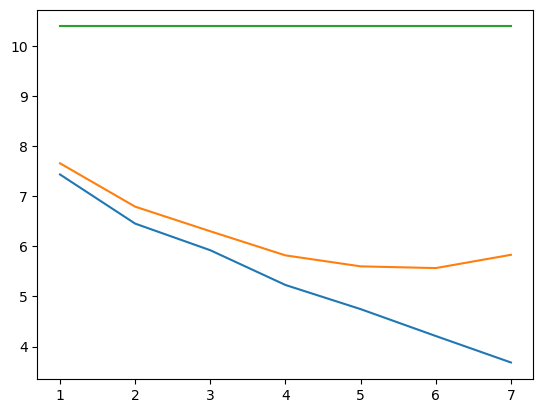

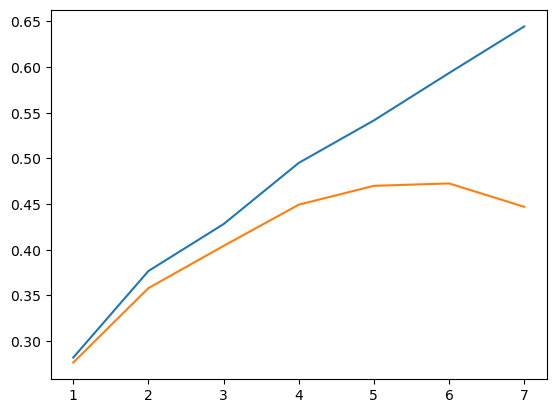

In [17]:
from sklearn.tree import DecisionTreeRegressor
mses=[]
msets=[]
r2s=[]
r2ts=[]
for d in range(1,8):
    msesd=[]
    msetsd=[]
    r2sd=[]
    r2tsd=[]
    for i in range(20):
        x, xt, y, yt = train_test_split(X, Y, test_size=0.15, random_state=i)
        clf = DecisionTreeRegressor(random_state=0,max_depth=d)
        clf.fit(x,y)
        py=clf.predict(x)
        pyt=clf.predict(xt)
        mse=np.mean((py-y)**2)
        mset=np.mean((pyt-yt)**2)
        yb=np.mean(y)
        r2=1-np.sum((py-y)**2)/np.sum((y-yb)**2)
        r2t=1-np.sum((pyt-yt)**2)/np.sum((yt-yb)**2)
        msesd.append(mse)
        msetsd.append(mset)
        r2sd.append(r2)
        r2tsd.append(r2t)
    mses.append(np.mean(msesd))
    msets.append(np.mean(msetsd))
    r2s.append(np.mean(r2sd))
    r2ts.append(np.mean(r2tsd))
    print(d,np.mean(msesd),np.mean(msetsd),np.mean(r2sd),np.mean(r2tsd))
yb=np.mean(Y)
nullmse=np.mean((Y-yb)**2)
plt.plot(range(1,8),mses)
plt.plot(range(1,8),msets)
plt.plot([1,7],[nullmse,nullmse])
plt.show()
plt.plot(range(1,8),r2s)
plt.plot(range(1,8),r2ts)
plt.show()


3 500 0.0535 0.25166666666666665
10 500 0.011 0.20166666666666666
30 500 0.0005 0.17666666666666667
100 500 0.0 0.15
300 500 0.0 0.15


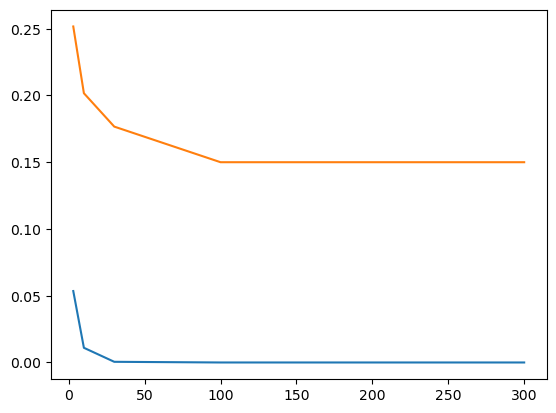

In [17]:
from sklearn.ensemble import RandomForestClassifier
errs=[]
errst=[]
ntrees=[3, 10, 30, 100, 300]
for k in ntrees:
    m=500#int(np.log(500))
    clf=RandomForestClassifier(n_estimators=k, max_features=m, random_state=0)
    clf.fit(x,y)
    py=clf.predict(x)
    pyt=clf.predict(xt)
    err=np.mean(py!=y)
    errt=np.mean(pyt!=yt)
    print(k,m,err,errt)
    errs.append(err)
    errst.append(errt)
plt.plot(ntrees,errs)
plt.plot(ntrees,errst)